<center>
<img src="https://image.aladin.co.kr/product/12609/37/cover500/k372532974_1.jpg" width="200" height="200"><br>
</center>


 - Github: [PinkWink](https://github.com/PinkWink/DataScience)

### 8장 자연어 처리 시작하기

- 한글 자연어 처리기초
- 워드 클라우드
- 육아휴직 관련 법안에 대한 분석
- Naive Bayes Classifier의 이해 - 영문
- Naive Bayes Classifier의 이해 - 한글
- 문장의 유사도 측정하기
- 여자친구 선물 고르기


#### 8-2 한글 자연어 처리 기초



In [49]:
from konlpy.tag import Kkma
kkma = Kkma()

먼저 꼬꼬마 모듈을 사용할 수 있게 한다.

In [2]:
kkma.sentences('한국어 분석을 시작합니다 재미있어요~~')

['한국어 분석을 시작합니다', '재미있어요~~']

그리고 문장(sentences)분석을 한다. ~~시작합니다 재미있어요 ~~ 에서 마침표(.)가 없어도 두 개의 문장으로 구분한다.

In [3]:
kkma.nouns('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석']

명사(nouns)분석도 수행합니다.

In [4]:
kkma.pos('한국어 분석을 시작합니다 재미있어요~~')

[('한국어', 'NNG'),
 ('분석', 'NNG'),
 ('을', 'JKO'),
 ('시작하', 'VV'),
 ('ㅂ니다', 'EFN'),
 ('재미있', 'VA'),
 ('어요', 'EFN'),
 ('~~', 'SW')]

현태소(pos)분석도 수행합니다. 한글은 영어와 달리 단어의 형태 변화가 많아서 영어처럼 쉽게 접근하기 어렵다. 그래서 최소한의 의미 단위인 현태소로 언어를 분석하는 것이 일반적이다.

In [5]:
from konlpy.tag import Hannanum
hannanum = Hannanum()

이번에는 한나눔(Hannanum)을 사용해 보겠다.

In [6]:
hannanum.nouns('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석', '시작']

한나눔의 명사 분석은 꼬꼬마와는 약간 다른 결과를 가져온다.

In [7]:
hannanum.morphs('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석', '을', '시작', '하', 'ㅂ니다', '재미있', '어요', '~~']

한나눔의 형태소 분석 결과 이다.

In [8]:
hannanum.pos('한국어 분석을 시작합니다 재미있어요~~')

[('한국어', 'N'),
 ('분석', 'N'),
 ('을', 'J'),
 ('시작', 'N'),
 ('하', 'X'),
 ('ㅂ니다', 'E'),
 ('재미있', 'P'),
 ('어요', 'E'),
 ('~~', 'S')]

이번에는 트위터(Twitter) 분석이다.

In [9]:
from konlpy.tag import Twitter
t = Twitter()

/home/ubuntu/.local/lib/python3.6/site-packages/konlpy/tag/_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [10]:
t.nouns('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석', '시작']

In [11]:
t.morphs('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석', '을', '시작', '합니다', '재미있어요', '~~']

역시 미세한 차이를 가지고 있다.

In [12]:
t.pos('한국어 분석을 시작합니다 재미있어요~~')

[('한국어', 'Noun'),
 ('분석', 'Noun'),
 ('을', 'Josa'),
 ('시작', 'Noun'),
 ('합니다', 'Verb'),
 ('재미있어요', 'Adjective'),
 ('~~', 'Punctuation')]

### 8-3 워드 클라우드

워드 클라우드(world cloud)는 자주 나타나는 단어를 크게 보여줌으로써 직관적으로 텍스트를 알리는데 도움을 준다. 파이썬에서 사용할 수 있는 워드 클라우드도 몇가지 있습니다만 여기서는 그중 하나를 소개할까 한다. 설치는 이미 8-1절에서 했으니 워드 클라우드 공식 Github에서 배포하는 튜토리얼을 일부 수정한 것을 우리도 튜토리얼하고 다음 절로 넘어가도록 하겠다.

In [13]:
#!pip3 install wordcloud

In [14]:
from wordcloud import WordCloud, STOPWORDS
import numpy as np
from PIL import Image

먼저 필요한 몇몇 모듈을 import 한다. 그리고 이상한 나라의 앨리스 영문 버전을 다운 받아서 data폴더에 저장하고 읽는다. 또한 앨리그 그림도 저장하자.

In [15]:
text = open('./data/09. alice.txt').read()
alice_mask = np.array(Image.open('./data/09. alice_mask.png'))

stopwords = set(STOPWORDS)
stopwords.add("said")

앨리스 소설에는 said 라는 단어가 많이 등장하는 모양이다. 이 단어는 카운트에서 제거하도록 하자.

In [16]:
import matplotlib.pyplot as plt
import platform

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    re('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family = font_name)
else:
    print('Unknown system... sorry~~~~')
        
%matplotlib inline

Unknown system... sorry~~~~


언제나 하는 matplotlib에서 한글 폰트를 설정했다.

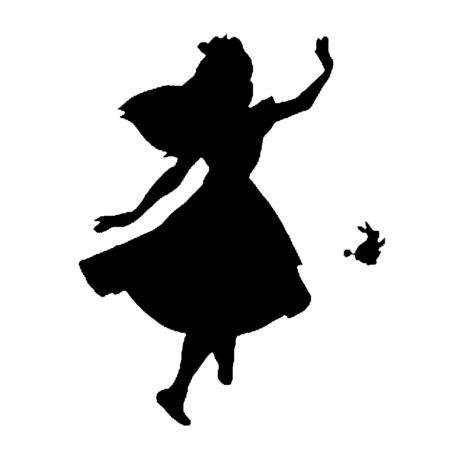

In [17]:
plt.figure(figsize=(8,8))
plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

이제 문서 자체에서 단어를 카운트하는 기능을 워드 클라우드가 제공하니 그것을 사용해서 최빈 단어를 찾자.

In [18]:
wc = WordCloud(background_color = 'white', max_words=2000, mask=alice_mask,
              stopwords = stopwords)
wc = wc.generate(text)
wc.words_

{'Alice': 1.0,
 'little': 0.29508196721311475,
 'one': 0.27595628415300544,
 'know': 0.2459016393442623,
 'went': 0.226775956284153,
 'thing': 0.2185792349726776,
 'time': 0.2103825136612022,
 'Queen': 0.20765027322404372,
 'see': 0.1830601092896175,
 'King': 0.17486338797814208,
 'well': 0.1721311475409836,
 'now': 0.16393442622950818,
 'head': 0.16393442622950818,
 'began': 0.15846994535519127,
 'way': 0.1557377049180328,
 'Hatter': 0.1557377049180328,
 'Mock Turtle': 0.15300546448087432,
 'say': 0.15027322404371585,
 'Gryphon': 0.15027322404371585,
 'think': 0.1448087431693989,
 'quite': 0.14207650273224043,
 'much': 0.13934426229508196,
 'first': 0.13934426229508196,
 'thought': 0.1366120218579235,
 'go': 0.1366120218579235,
 'come': 0.13114754098360656,
 'never': 0.1284153005464481,
 'voice': 0.12568306010928962,
 'looked': 0.12295081967213115,
 'got': 0.12295081967213115,
 'must': 0.12021857923497267,
 'Cat': 0.12021857923497267,
 'Duchess': 0.11475409836065574,
 'Mouse': 0.11202

그 결과는 위에 나와있다. Alice가 가장 많이 등장했다. 
- 이제 위에 코드 결과를 엘리스 그림에 겹쳐 보이게 할 것이다.

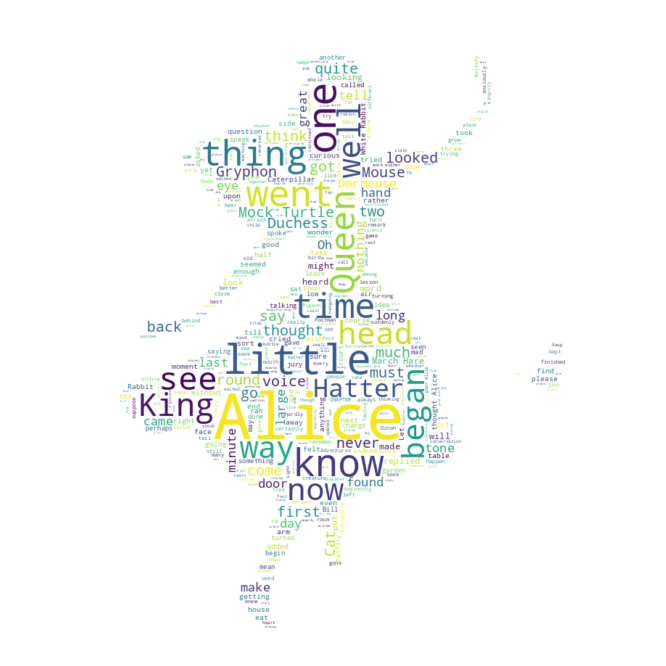

In [19]:
plt.figure(figsize=(12,12))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

뭔가 시각적 효과가 괜찮아 보인다. 그 다음은 스타워즈의 A New Hope 텍스트 이다.

In [20]:
text = open('./data/09. a_new_hope.txt').read()

text = text.replace('HAN', 'Han')
text = text.replace("LUKE'S", 'Luke')

mask = np.array(Image.open('./data/09. stormtrooper_mask.png'))

여기서도 특수하게 처리해야 할 단어를 처리하자.

In [21]:
stopwords = set(STOPWORDS)
stopwords.add("int")
stopwords.add("ext")

그리고 워드 클라우드를 준비하자.

In [22]:
wc = WordCloud(max_words=1000, mask=mask, stopwords=stopwords,
              margin=10, random_state=1).generate(text)

default_colors = wc.to_array()

이번에는 앨리스와는 약간 달리 색상을 전체적으로 회색(grey)으로 채우도록 함수를 하나 만들어 두자.

In [23]:
import random
def grey_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return 'hsl(0,0%%,%d%%)' % random.randint(60, 100)

그리고 그려보자.

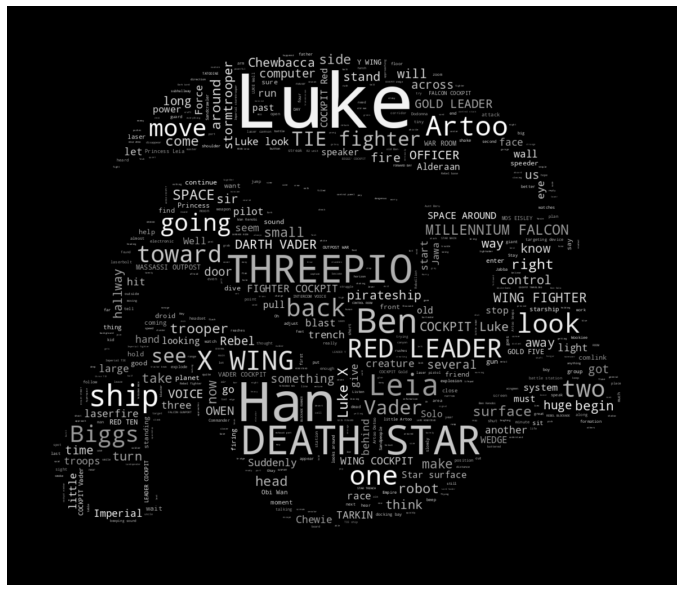

In [24]:
plt.figure(figsize=(12,12))
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3),
          interpolation='bilinear')
plt.axis('off')
plt.show()

그러면 위와 같이 나타난다. 회색 톤의 색상과 아주 잘 어울리는 것 같다. 문서의 성격과 어울리는 그림에 워드 클라우드를 적용하면 꽤 좋은 효과를 얻을 수 있다.

#### 8-4 육아휴직 관련 법안에 대한 분석

이번에는 Lucy Park 님의 KoNLPy가 내장하고 있는 법률 문서 중 하나를 가지고 기초적인 분석을 해보는 튜토리얼을 아주 미세한 부분 일부를 수정해서 학습하려 한다.

In [25]:
#!pip3 install nltk

In [26]:
import nltk

In [27]:
from konlpy.corpus import kobill
files_ko = kobill.fileids()
doc_ko = kobill.open('1809890.txt').read()

먼저 ultk를 임포트하고 KoNLPy의 내부 문서 중 육하휴직 관련 법안 제 1809890호를 읽는다. 이 법률은 비록 공무원에 한정하고 있지만 육아휴직 대상이 되는 아이의 나이를 만6세에서 만8세로 확장 하는 내용을 담고있다. 

In [28]:
doc_ko

'지방공무원법 일부개정법률안\n\n(정의화의원 대표발의 )\n\n 의 안\n 번 호\n\n9890\n\n발의연월일 : 2010.  11.  12.  \n\n발  의  자 : 정의화․이명수․김을동 \n\n이사철․여상규․안규백\n\n황영철․박영아․김정훈\n\n김학송 의원(10인)\n\n제안이유 및 주요내용\n\n  초등학교 저학년의 경우에도 부모의 따뜻한 사랑과 보살핌이 필요\n\n한 나이이나, 현재 공무원이 자녀를 양육하기 위하여 육아휴직을 할 \n\n수 있는 자녀의 나이는 만 6세 이하로 되어 있어 초등학교 저학년인 \n\n자녀를 돌보기 위해서는 해당 부모님은 일자리를 그만 두어야 하고 \n\n이는 곧 출산의욕을 저하시키는 문제로 이어질 수 있을 것임.\n\n  따라서 육아휴직이 가능한 자녀의 연령을 만 8세 이하로 개정하려\n\n는 것임(안 제63조제2항제4호).\n\n- 1 -\n\n\x0c법률  제        호\n\n지방공무원법 일부개정법률안\n\n지방공무원법 일부를 다음과 같이 개정한다.\n\n제63조제2항제4호 중 “만 6세 이하의 초등학교 취학 전 자녀를”을 “만 \n\n8세 이하(취학 중인 경우에는 초등학교 2학년 이하를 말한다)의 자녀를”\n\n로 한다.\n\n부      칙\n\n이 법은 공포한 날부터 시행한다.\n\n- 3 -\n\n\x0c신 ·구조문대비표\n\n현      행\n\n개   정   안\n\n제63조(휴직) ① (생  략)\n\n제63조(휴직) ① (현행과 같음)\n\n  ② 공무원이 다음 각 호의 어\n\n  ② -------------------------\n\n느 하나에 해당하는 사유로 휴\n\n----------------------------\n\n직을 원하면 임용권자는 휴직\n\n----------------------------\n\n을 명할 수 있다. 다만, 제4호\n\n-------------.---------------\n\n의 경우에는 대통령령으로 정\n\n---------------------------

이 문서를 Twitter 분석기로 명사 분석을 하겠다.

In [29]:
from konlpy.tag import Twitter; t= Twitter()
tokens_ko = t.nouns(doc_ko)
tokens_ko

/home/ubuntu/.local/lib/python3.6/site-packages/konlpy/tag/_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


['지방공무원법',
 '일부',
 '개정',
 '법률',
 '안',
 '정의화',
 '의원',
 '대표',
 '발의',
 '의',
 '안',
 '번',
 '호',
 '발의',
 '연월일',
 '발',
 '의',
 '자',
 '정의화',
 '이명수',
 '김을동',
 '이사철',
 '여상규',
 '안규백',
 '황영철',
 '박영아',
 '김정훈',
 '김학송',
 '의원',
 '인',
 '제안',
 '이유',
 '및',
 '내용',
 '초등학교',
 '저학년',
 '경우',
 '부모',
 '사랑',
 '필요',
 '나이',
 '현재',
 '공무원',
 '자녀',
 '양육',
 '위',
 '육아휴직',
 '수',
 '자녀',
 '나이',
 '만',
 '세',
 '이하',
 '초등학교',
 '저학년',
 '자녀',
 '위',
 '해당',
 '부모님',
 '일자리',
 '곧',
 '출산',
 '의욕',
 '저하',
 '문제',
 '수',
 '것임',
 '따라서',
 '육아휴직',
 '자녀',
 '연령',
 '만',
 '세',
 '이하',
 '개정',
 '것임',
 '안',
 '제',
 '항제',
 '호',
 '법률',
 '제',
 '호',
 '지방공무원법',
 '일부',
 '개정',
 '법률',
 '안',
 '지방공무원법',
 '일부',
 '다음',
 '개정',
 '제',
 '항제',
 '호',
 '중',
 '만',
 '세',
 '이하',
 '초등학교',
 '취학',
 '전',
 '자녀',
 '만',
 '세',
 '이하',
 '취학',
 '중인',
 '경우',
 '초등학교',
 '학년',
 '이하',
 '말',
 '의',
 '자녀',
 '로',
 '부',
 '칙',
 '이',
 '법',
 '공포',
 '날',
 '시행',
 '신',
 '구조',
 '문대비',
 '표',
 '현',
 '행',
 '개',
 '정',
 '안',
 '제',
 '휴직',
 '생',
 '략',
 '제',
 '휴직',
 '현행',
 '공무원',
 '다음',
 '각',
 '호의',
 '느',
 '

그리고 수집된 단어의 횟수(len(ko.tokens))와 고유한 횟수 (len(set(ko.token))) 를 확인한다.

In [30]:
ko = nltk.Text(tokens_ko, name='대한민국 국회 의안 제 1809890호')

In [31]:
print(len(ko.tokens))     #returns number of token (document length)
print(len(set(ko.tokens)))  #return number of unique tokens
ko.vocab()  # return frequency distribution


735
250


FreqDist({'육아휴직': 38, '발생': 19, '만': 18, '이하': 18, '비용': 17, '액': 17, '경우': 16, '세': 16, '자녀': 14, '고용': 14, ...})

In [32]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
    print('Mac version')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
    print('Windows version')
elif platform.system() == 'Linux':
    path = "/usr/share/fonts/NanumFont/NanumGothicBold.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.rc('font', family=font_name)
    print('Linux version')
else:
    print('Unknown system... sorry~~~~')

Linux version


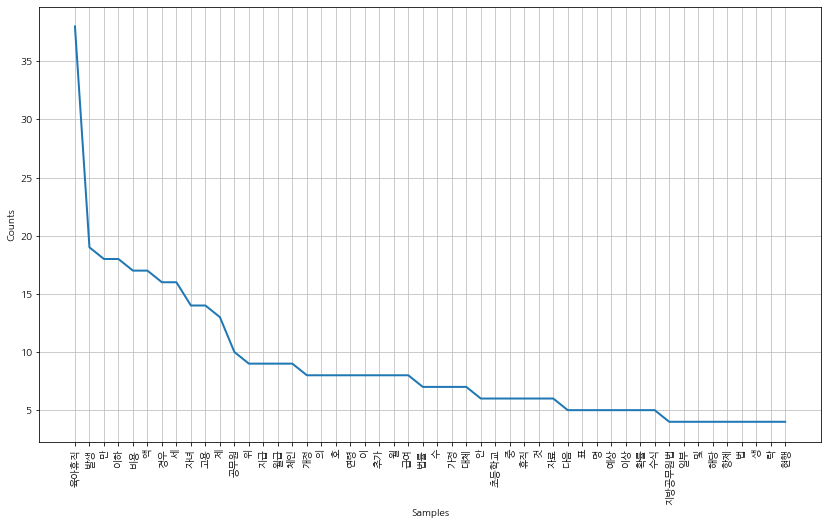

In [33]:
# import matplotlib.pyplot as plt
# import platform

# path = "c:/Windows/Fonts/malgun.ttf"
# from matplotlib import font_manager, rc
# if platform.system() == 'Darwin':
#     re('font', family='AppleGothic')
# elif platform.system() == 'Windows':
#     font_name = font_manager.FontProperties(fname=path).get_name()
#     rc('font', family = font_name)
#     print('Unknown system... sorry~~~~')
# else:
#     print('Unknown system... sorry~~~~')
        
# %matplotlib inline


plt.figure(figsize=(14,8))
ko.plot(50)
plt.show()

많이 등장한 순으로 plot 해볼 수 있다. 당연하겠지만 '육아휴직'이라는 단어가 많이 등장한다. 그런데 약간 의미 없는 단어도 보인다. 한글은 영어와 달리 sropwords를 지정하기 쉽지 않다. 그래서 case-by-case로 지정하겠다

In [34]:
stop_words = ['.','(',')',',',"'",'%','-','X', ').',
              'x','의','자','에','안','번',
              '호','을','이','다','만','로','가','를']
ko = [each_word for each_word in ko if each_word not in stop_words]
ko

['지방공무원법',
 '일부',
 '개정',
 '법률',
 '정의화',
 '의원',
 '대표',
 '발의',
 '발의',
 '연월일',
 '발',
 '정의화',
 '이명수',
 '김을동',
 '이사철',
 '여상규',
 '안규백',
 '황영철',
 '박영아',
 '김정훈',
 '김학송',
 '의원',
 '인',
 '제안',
 '이유',
 '및',
 '내용',
 '초등학교',
 '저학년',
 '경우',
 '부모',
 '사랑',
 '필요',
 '나이',
 '현재',
 '공무원',
 '자녀',
 '양육',
 '위',
 '육아휴직',
 '수',
 '자녀',
 '나이',
 '세',
 '이하',
 '초등학교',
 '저학년',
 '자녀',
 '위',
 '해당',
 '부모님',
 '일자리',
 '곧',
 '출산',
 '의욕',
 '저하',
 '문제',
 '수',
 '것임',
 '따라서',
 '육아휴직',
 '자녀',
 '연령',
 '세',
 '이하',
 '개정',
 '것임',
 '제',
 '항제',
 '법률',
 '제',
 '지방공무원법',
 '일부',
 '개정',
 '법률',
 '지방공무원법',
 '일부',
 '다음',
 '개정',
 '제',
 '항제',
 '중',
 '세',
 '이하',
 '초등학교',
 '취학',
 '전',
 '자녀',
 '세',
 '이하',
 '취학',
 '중인',
 '경우',
 '초등학교',
 '학년',
 '이하',
 '말',
 '자녀',
 '부',
 '칙',
 '법',
 '공포',
 '날',
 '시행',
 '신',
 '구조',
 '문대비',
 '표',
 '현',
 '행',
 '개',
 '정',
 '제',
 '휴직',
 '생',
 '략',
 '제',
 '휴직',
 '현행',
 '공무원',
 '다음',
 '각',
 '호의',
 '느',
 '하나',
 '해당',
 '사유',
 '직',
 '임용',
 '휴직',
 '명',
 '수',
 '다만',
 '제',
 '경우',
 '대통령령',
 '정',
 '사정',
 '직',
 '명',
 '생',
 '략',
 '현

그리고 난 후 다시 그려보겠다.

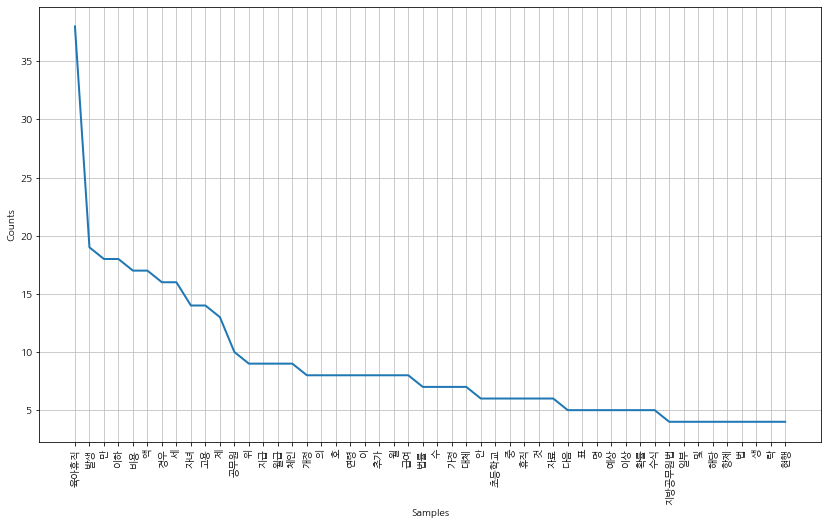

In [35]:
ko = nltk.Text(tokens_ko, name='대한민국 국회 의안 제 1809890호')

plt.figure(figsize=(14,8))
ko.plot(50)
plt.show()

이제 조금 더 좋아 보인다. 좀더 stop_words 변수에 의미 없어 보이는 단어를 추가하면 된다.

In [36]:
ko.count('초등학교')

6

어떤 단어가 문서 내에서 몇 번 언급되었는지 확인할 수 있다.

/home/ubuntu/.local/lib/python3.6/site-packages/nltk/draw/__init__.py:15: UserWarning: nltk.draw package not loaded (please install Tkinter library).
  warnings.warn("nltk.draw package not loaded (please install Tkinter library).")


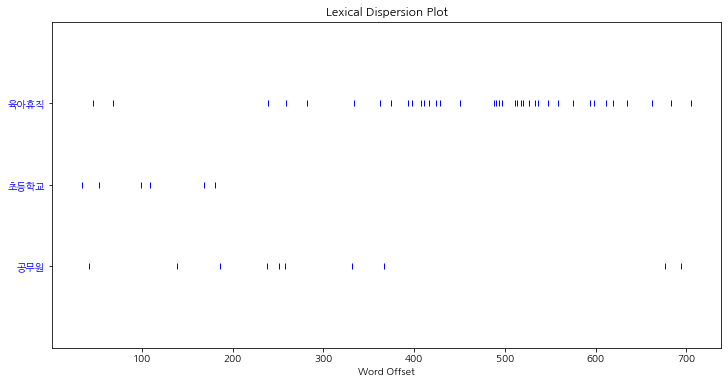

In [37]:
plt.figure(figsize=(12,6))
ko.dispersion_plot(['육아휴직','초등학교','공무원'])

또한 원하는 단어의 문서 내 위치를 개략적으로 그 분량과 함께 알 수 있다.

In [38]:
ko.concordance('초등학교')

Displaying 6 of 6 matches:
 안규백 황영철 박영아 김정훈 김학송 의원 인 제안 이유 및 내용 초등학교 저학년 경우 부모 사랑 필요 나이 현재 공무원 자녀 양육 위 육아
이 현재 공무원 자녀 양육 위 육아휴직 수 자녀 나이 만 세 이하 초등학교 저학년 자녀 위 해당 부모님 일자리 곧 출산 의욕 저하 문제 수 
법률 안 지방공무원법 일부 다음 개정 제 항제 호 중 만 세 이하 초등학교 취학 전 자녀 만 세 이하 취학 중인 경우 초등학교 학년 이하 말
 만 세 이하 초등학교 취학 전 자녀 만 세 이하 취학 중인 경우 초등학교 학년 이하 말 의 자녀 로 부 칙 이 법 공포 날 시행 신 구조 
제 호 의 경우 대통령령 정 사정 직 명 생 략 현행 만 세 이하 초등학교 취 만 세 이하 취학 중인 경우 학 전 자녀 양육 위 초등학교 학
하 초등학교 취 만 세 이하 취학 중인 경우 학 전 자녀 양육 위 초등학교 학년 이하 여 여자 공무원 말 의 자녀 임신 출산 때 생 략 생 


원하는 단어의 주변부 단어까지 같이 확인할 수 있다. 또 문서 내에서 어떤 단어들이 연어(collocation)로 사용되었는지 알 수 있다.

In [39]:
# import nltk
# nltk.download('stopwords')
ko.collocations()

초등학교 저학년; 근로자 육아휴직; 육아휴직 대상자; 공무원 육아휴직


그리고 앞 절에서 학습한 워드 클라우드를 적용해보자

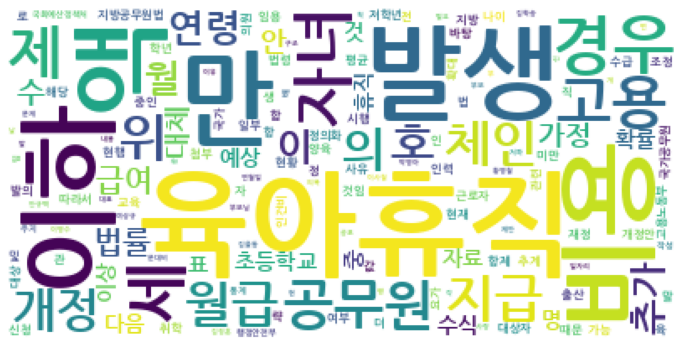

In [40]:
data = ko.vocab().most_common(150)

wordcloud = WordCloud(font_path= '/usr/share/fonts/NanumFont/NanumGothicBold.ttf',
                      relative_scaling = 0.2,
                      background_color='white',
                      ).generate_from_frequencies(dict(data))

plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### 8-5 Naive Bayes Classifier 의 이해 - 영문
정말 심플한 분류기가 있다. 뭐 지도학습의 한 종류이면서 두 사건을 서로 독립이라고 가정하고 각각의 조건부확률을 어떻게 한다는 개념입니다만, 이책에서는 예제를 통해 이 분류기의 특성을 확인하고 간편하게 사용해보도록 하겠다. 예를 들어보겠다. 지도학습이니까 긍정(pos),부정(neg)이라는 태그가 있다. i like you는 긍정이지만, you like me는 부정이다. 이 두 문장만 보면 i가 등장할 때는 긍정이다. like는 판단 못하겠다.
이제 뭔가 느껴지나요?

In [41]:
from nltk.tokenize import word_tokenize
import nltk

일단 필요한 모듈 가지고 온다. 연습용(train) 데이터를 딱 4개의 문장만으로 입력해보자.

In [42]:
train = [('i like you', 'pos'),
        ('i hate you', 'neg'),
        ('you like me', 'neg'),
        ('i like her', 'pos')]

그리고 위 코드의 train 문장에서 사용된 전체 단어를 찾는다.

In [55]:
import nltk
#nltk.download('punkt')

all_words = set(word.lower() for sentence in train
                                  for word in word_tokenize(sentence[0]))
all_words

{'hate', 'her', 'i', 'like', 'me', 'you'}

위 코드의 결과를 비록 너무 작은 수의 단어이지만 '말뭉치'라고 해두자.

In [56]:
t = [({word: (word in word_tokenize(x[0])) for word in all_words}, x[1]) for x in train]
t

[({'like': True,
   'hate': False,
   'me': False,
   'her': False,
   'you': True,
   'i': True},
  'pos'),
 ({'like': False,
   'hate': True,
   'me': False,
   'her': False,
   'you': True,
   'i': True},
  'neg'),
 ({'like': True,
   'hate': False,
   'me': True,
   'her': False,
   'you': True,
   'i': False},
  'neg'),
 ({'like': True,
   'hate': False,
   'me': False,
   'her': True,
   'you': False,
   'i': True},
  'pos')]

즉, train의 첫 문장인 "i like you"의 경우 말뭉치 단어[hate, her, i, like, me, you]를 기준으로 해당 단어가 있는지 없는지를 기록해둔 것이다. 그래서 코드의 결과 첫 부분만 해석하면 train문장의 첫문장에는 hate는 없고 (False), her도 없고 (False),i는 있다 (True)는 뜻이다. 이제 이를 이용해서 naive Bayes 분류기를 동작시키도록 한다.

In [57]:
classifier = nltk.NaiveBayesClassifier.train(t)
classifier.show_most_informative_features()

Most Informative Features
                    hate = False             pos : neg    =      1.7 : 1.0
                     her = False             neg : pos    =      1.7 : 1.0
                       i = True              pos : neg    =      1.7 : 1.0
                    like = True              pos : neg    =      1.7 : 1.0
                      me = False             pos : neg    =      1.7 : 1.0
                     you = True              neg : pos    =      1.7 : 1.0


이 코드의 결과를 잘 이해하면 Naive Bayes 분류기를 이해하기 편하다. Train 문장에 붙은 긍정/부정 태그를 이용해서 분류한 결과 'hate'라는 단어가 없을때 (False) 긍정일 비율이 1.7:1 이라는 의미이다. 'like'라는 단어가 총 세번 사용되었고, 그 중 2개 문장이 긍정의 의미였다. 그래서 'like'가 있을때 (True)긍정일 확률이 1.7:1이다. 문장이 4개뿐이라서 전체 단어를 놓고 생각하기 어렵지 않을 것이다.

In [59]:
test_sentence = 'i like MeRui'
test_sent_features = {word.lower():
                     (word in word_tokenize(test_sentence.lower()))
                     for word in all_words}

test_sent_features

{'like': True,
 'hate': False,
 'me': False,
 'her': False,
 'you': False,
 'i': True}

그런데 이번에는 테스트 문장(test_sentence)를 'i like MeRui'로 만들어서 만든 분류기를 통과시켜보겠다.

In [60]:
classifier.classify(test_sent_features)

'pos'

'pos'하다는 결과가 나온다. 물론 겨우 4개의 문장을 가지고 이런 결과가 나오게 유도한 것이지만 목적은 예제이니까요. 만약 분류기를 가동시킬 문장이 많다면 아주 신뢰성 있는 결론을 얻을 수 있을 것이다. 굉장히 'naive'하지만 정말 잘 동작한다는 평가를 받는 것이 Naive Bayes Classifier 이다.

### 8-6 Naive Bayes Classifier의 이해 -한글

In [61]:
from konlpy.tag import Twitter

In [62]:
pos_tagger = Twitter()

이제 8-5절의 내용을 한글로도 적용을 시키겠다. 그러나 한글에서는 형태소 분석을 통해야 한다. 일단 형태소 부석을 하지 않으면 어떻게 되는지 확인을 해보자.

In [67]:
train = [('메리가 좋아', 'pos'),
         ('고양이도 좋아', 'pos'),
         ('난 수업이 지루해', 'neg'),
         ('메리는 이쁜 고양이야','pos'),
         ('난 마치고 메리랑 놀거야', 'pos')]

이 문장들을 가지고 말뭉치를 만들어보겠다.

In [69]:
all_words = set(word.lower() for sentence in train
                                   for word in word_tokenize(sentence[0]))

all_words

{'고양이도',
 '고양이야',
 '난',
 '놀거야',
 '마치고',
 '메리가',
 '메리는',
 '메리랑',
 '수업이',
 '이쁜',
 '좋아',
 '지루해'}

벌써 '고양이도'와 '고양이야', '메리가'와 '메리는'이 다른 단어로 잡힌 것을 볼 수 있다.

In [70]:
t = [({word: (word in word_tokenize(x[0])) for word in all_words}, x[1])
                                                for x in train]
t

[({'고양이야': False,
   '수업이': False,
   '좋아': True,
   '지루해': False,
   '이쁜': False,
   '난': False,
   '놀거야': False,
   '고양이도': False,
   '메리는': False,
   '마치고': False,
   '메리가': True,
   '메리랑': False},
  'pos'),
 ({'고양이야': False,
   '수업이': False,
   '좋아': True,
   '지루해': False,
   '이쁜': False,
   '난': False,
   '놀거야': False,
   '고양이도': True,
   '메리는': False,
   '마치고': False,
   '메리가': False,
   '메리랑': False},
  'pos'),
 ({'고양이야': False,
   '수업이': True,
   '좋아': False,
   '지루해': True,
   '이쁜': False,
   '난': True,
   '놀거야': False,
   '고양이도': False,
   '메리는': False,
   '마치고': False,
   '메리가': False,
   '메리랑': False},
  'neg'),
 ({'고양이야': True,
   '수업이': False,
   '좋아': False,
   '지루해': False,
   '이쁜': True,
   '난': False,
   '놀거야': False,
   '고양이도': False,
   '메리는': True,
   '마치고': False,
   '메리가': False,
   '메리랑': False},
  'pos'),
 ({'고양이야': False,
   '수업이': False,
   '좋아': False,
   '지루해': False,
   '이쁜': False,
   '난': True,
   '놀거야': True,
   '고양이도': False,
   '메리는': False,
   '마치고':

그러면 동일 과정을 거친 후,

In [84]:
classifier = nltk.NaiveBayesClassifier.train(t)
classifier.show_most_informative_features()

Most Informative Features
                       난 = True              neg : pos    =      2.5 : 1.0
                      좋아 = False             neg : pos    =      1.5 : 1.0
                    고양이도 = False             neg : pos    =      1.1 : 1.0
                    고양이야 = False             neg : pos    =      1.1 : 1.0
                     놀거야 = False             neg : pos    =      1.1 : 1.0
                     마치고 = False             neg : pos    =      1.1 : 1.0
                     메리가 = False             neg : pos    =      1.1 : 1.0
                     메리는 = False             neg : pos    =      1.1 : 1.0
                     메리랑 = False             neg : pos    =      1.1 : 1.0
                      이쁜 = False             neg : pos    =      1.1 : 1.0


만들어진 분류기의 동작을 장담하기 어렵다.

In [85]:
test_sentence = '난 수업이 마치면 메리랑 놀거야'

긍정적인 결과가 나와야 할 것 같은 위 테스트 문장을 적용해 보겠다.

In [89]:
test_sent_features = {word.lower():
                                 (word in word_tokenize(test_sentence.lower()))
                                 for word in all_words}

test_sent_features

{'고양이야': False,
 '수업이': True,
 '좋아': False,
 '지루해': False,
 '이쁜': False,
 '난': True,
 '놀거야': True,
 '고양이도': False,
 '메리는': False,
 '마치고': False,
 '메리가': False,
 '메리랑': True}

그러면 다음과 같이 부정적(neg)이라고 나타난다.

In [90]:
classifier.classify(test_sent_features)

'neg'

결국 한글을 다룰 때는 형태소 분석이 필요하다.

In [91]:
def tokenize(doc):
    return['/'.join(t) for t in pos_tagger.pos(doc, norm=True, stem=True)]

8-1절에서 소개한 Lucy Park 님에 따르면 위 함수처럼 태그를 붙여주는 것이 유리하다고 한다. 위 코드의 tokenize 함수를 사용해서 train 문장을 분석한다.

In [92]:
train_docs = [(tokenize(row[0]), row[1]) for row in train]
train_docs

[(['메리/Noun', '가/Josa', '좋다/Adjective'], 'pos'),
 (['고양이/Noun', '도/Josa', '좋다/Adjective'], 'pos'),
 (['난/Noun', '수업/Noun', '이/Josa', '지루하다/Adjective'], 'neg'),
 (['메리/Noun', '는/Josa', '이쁘다/Adjective', '고양이/Noun', '야/Josa'], 'pos'),
 (['난/Noun', '마치/Noun', '고/Josa', '메리/Noun', '랑/Josa', '놀다/Verb'], 'pos')]

그리고 이렇게

In [93]:
tokens = [t for d in train_docs for t in d[0]]
tokens

['메리/Noun',
 '가/Josa',
 '좋다/Adjective',
 '고양이/Noun',
 '도/Josa',
 '좋다/Adjective',
 '난/Noun',
 '수업/Noun',
 '이/Josa',
 '지루하다/Adjective',
 '메리/Noun',
 '는/Josa',
 '이쁘다/Adjective',
 '고양이/Noun',
 '야/Josa',
 '난/Noun',
 '마치/Noun',
 '고/Josa',
 '메리/Noun',
 '랑/Josa',
 '놀다/Verb']

전체 말뭉치도 만들었다.

In [94]:
def term_exists(doc):
    return {word: (word in set(doc)) for word in tokens}

말뭉치에 있는 단어가 있는지 아닌지를 구분하는 함수를 만들어서 train 문장에 적용한다. 조사(Josa)인지 명사(Noun)인지 구분이 잘 되어 있어서 판독하기 좋다.

In [95]:
train_xy = [(term_exists(d), c) for d,c in train_docs]
train_xy

[({'메리/Noun': True,
   '가/Josa': True,
   '좋다/Adjective': True,
   '고양이/Noun': False,
   '도/Josa': False,
   '난/Noun': False,
   '수업/Noun': False,
   '이/Josa': False,
   '지루하다/Adjective': False,
   '는/Josa': False,
   '이쁘다/Adjective': False,
   '야/Josa': False,
   '마치/Noun': False,
   '고/Josa': False,
   '랑/Josa': False,
   '놀다/Verb': False},
  'pos'),
 ({'메리/Noun': False,
   '가/Josa': False,
   '좋다/Adjective': True,
   '고양이/Noun': True,
   '도/Josa': True,
   '난/Noun': False,
   '수업/Noun': False,
   '이/Josa': False,
   '지루하다/Adjective': False,
   '는/Josa': False,
   '이쁘다/Adjective': False,
   '야/Josa': False,
   '마치/Noun': False,
   '고/Josa': False,
   '랑/Josa': False,
   '놀다/Verb': False},
  'pos'),
 ({'메리/Noun': False,
   '가/Josa': False,
   '좋다/Adjective': False,
   '고양이/Noun': False,
   '도/Josa': False,
   '난/Noun': True,
   '수업/Noun': True,
   '이/Josa': True,
   '지루하다/Adjective': True,
   '는/Josa': False,
   '이쁘다/Adjective': False,
   '야/Josa': False,
   '마치/Noun': False,
   '고/Jo

이제 분류기를 동작시키겠다.

In [96]:
classifier = nltk.NaiveBayesClassifier.train(train_xy)

그리고 나서 형태소 분석을 안 했을 때 부정되었던 문장을 다시 가지고 테스트 하겠다.

In [97]:
test_sentence = [("난 수업이 마치면 메리랑 놀거야")]

그리고 역시 동일하게 형태소 분석한다.

In [98]:
test_docs = pos_tagger.pos(test_sentence[0])
test_docs

[('난', 'Noun'),
 ('수업', 'Noun'),
 ('이', 'Josa'),
 ('마치', 'Noun'),
 ('면', 'Josa'),
 ('메리', 'Noun'),
 ('랑', 'Josa'),
 ('놀거야', 'Verb')]

In [99]:
test_sent_features = {word: (word in tokens) for word in test_docs}
test_sent_features

{('난', 'Noun'): False,
 ('수업', 'Noun'): False,
 ('이', 'Josa'): False,
 ('마치', 'Noun'): False,
 ('면', 'Josa'): False,
 ('메리', 'Noun'): False,
 ('랑', 'Josa'): False,
 ('놀거야', 'Verb'): False}

이제 결과를 보겠다.

In [100]:
classifier.classify(test_sent_features)

'pos'

예상대로, 정확하게는 의도한 대로 긍정(pos)의 의ㅣ가 잘 드러났다.

### 8-7 문장의 유사도 측정하기

앞 절에서 간략하게 분류에 대해 이야기 했다. 그러나 지도학습이어서 미리 정답을 알고 있어야 한다. 이번 절에서는 많은 문장 혹은 문서들 중에서 유사한 문장을 찾아내는 방법에 대해 설명하겠다. 만약 어떤 문장을 벡터로 표현할 수 있다면 벡터 간 거리를 구하는 방법으로 정말 손쉽게 해결할 수 있다.

In [101]:
from sklearn.feature_extraction.text import CountVectorizer

In [102]:
vectorizer = CountVectorizer(min_df = 1)

먼저 scikit learn에서 텍스트 특징(feature)을 추출하는 모듈에서 CountVectorizer라는 함수를 import 한다.

In [103]:
contents = ['메리랑 놀러가고 싶지만 바쁜데 어떻하죠?',
            '메리는 공원에서 산책하고 노는 것을 싫어해요',
           '메리는 공원에서 노는 것도 싫어해요. 이상해요.',
           '먼 곳으로 여행을 떠나고 싶은데 너무 바빠서 그러질 못하고 있어요']

그리고 유사한 문장을 연습용으로 사용하겠습니다. 실제로는 아주 많으 문장을 대상으로 해야 하지만 지금은 그저 절차를 연습하는 과정이니까요.

In [104]:
X = vectorizer.fit_transform(contents)
vectorizer.get_feature_names()

['것도',
 '것을',
 '곳으로',
 '공원에서',
 '그러질',
 '너무',
 '노는',
 '놀러가고',
 '떠나고',
 '메리는',
 '메리랑',
 '못하고',
 '바빠서',
 '바쁜데',
 '산책하고',
 '싫어해요',
 '싶은데',
 '싶지만',
 '어떻하죠',
 '여행을',
 '이상해요',
 '있어요']

첫 문장을 예로 들면 단어들을 feature로 잡게 된다. 문제는 메리랑과 메리는을 구분하는 것이다. 일단 이 상태에서 문장이 어떻게 벡터로 표현되었는지는 그림 8-19에서 나타난다. 첫 열이 8번 행에서 처음으로 1이 나타나는데 그것은 놀러가고라는 단어를 의미한다. 거기서부터 두 단어 건너서 세 번째 단어 자리에서 또 1이 나타나는데 그것은 메미랑을 의미한다.

이제 좀 더 한글 문장에 대한 벡터화를 합리적으로 진행해 보자.

In [105]:
from konlpy.tag import Twitter
t = Twitter()

KoNLPy의 Twitter를 이용해서 형태소 분석을 한 결과를 token으로 두자.

In [107]:
contents_tokens = [t.morphs(row) for row in contents]
contents_tokens

[['메리', '랑', '놀러', '가고', '싶지만', '바쁜데', '어떻하죠', '?'],
 ['메리', '는', '공원', '에서', '산책', '하고', '노', '는', '것', '을', '싫어해요'],
 ['메리', '는', '공원', '에서', '노', '는', '것', '도', '싫어해요', '.', '이상해요', '.'],
 ['먼',
  '곳',
  '으로',
  '여행',
  '을',
  '떠나고',
  '싶은데',
  '너무',
  '바빠서',
  '그러질',
  '못',
  '하고',
  '있어요']]

이제는 '메리랑','메리는'을 '메리'로 분리해서 같은 단어로 보는 것을 볼 수 있다. 형태소 분석을 한 후 띄어쓰기로 구분하고 그것 자체를 하나의 문장(sentence)으로 만들어서 scikit learn의 vectorizer 함수에서 사용하기 편하게 편집한다.

In [109]:
contents_for_vectorize = []
for content in contents_tokens:
    sentence = ''
    for word in content:
        sentence = sentence + ' ' + word
        
    contents_for_vectorize.append(sentence)
    
contents_for_vectorize

[' 메리 랑 놀러 가고 싶지만 바쁜데 어떻하죠 ?',
 ' 메리 는 공원 에서 산책 하고 노 는 것 을 싫어해요',
 ' 메리 는 공원 에서 노 는 것 도 싫어해요 . 이상해요 .',
 ' 먼 곳 으로 여행 을 떠나고 싶은데 너무 바빠서 그러질 못 하고 있어요']

그리고 feature를 찾도록 하자.

In [110]:
X = vectorizer.fit_transform(contents_for_vectorize)
num_samples, num_features = X.shape
num_samples, num_features

(4, 20)

이렇게 잡은 feature를 확인해 보기 위해 다음과 같이 작성한다.

In [111]:
vectorizer.get_feature_names()

['가고',
 '공원',
 '그러질',
 '너무',
 '놀러',
 '떠나고',
 '메리',
 '바빠서',
 '바쁜데',
 '산책',
 '싫어해요',
 '싶은데',
 '싶지만',
 '어떻하죠',
 '에서',
 '여행',
 '으로',
 '이상해요',
 '있어요',
 '하고']

그리고 리스트를 받고 다시 다음과 같이 벡터화 한다.

In [130]:
X.toarray().transpose()

array([[1, 0, 0, 0],
       [0, 1, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [1, 1, 1, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 1, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [0, 1, 0, 1]])

In [141]:
X = vectorizer.fit_transform(contents_for_vectorize)
num_samples, num_features = X.shape
num_samples, num_features

(4, 20)

이제 새로운 문장이 있으면 그 문장을 동일한 과정으로 벡터화해서 각 벡터들 사이의 거리를 구하면 된다.

In [143]:
new_post = ['메리랑 공원에서 산책하고 놀고 싶어요']
new_post_tokens = [t.morphs(row) for row in new_post]

new_post_for_vectorize = []

for content in new_post_tokens:
    sentence = ''
    for word in content:
        sentence = sentence + ' ' + word
        
    new_post_for_vectorize.append(sentence)
    
new_post_for_vectorize

[' 메리 랑 공원 에서 산책 하고 놀고 싶어요']

새로운 문장은 '메리랑 공원에서 산책하고 놀고 싶어요' 입니다. 이 문장도 위와 동일한 과정을 거쳐 벡터화 시키자.

In [145]:
new_post_vec = vectorizer.transform(new_post_for_vectorize)


In [146]:
new_post_vec.toarray()

array([[0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1]])

이제 새로운 문장(new_post_vec)과 비교해야 할 문장(contents)들 각각에 대해 거리를 구하면 된다.

In [147]:
import scipy as sp

def dist_raw(v1, v2):
    delta = v1 - v2
    return sp.linalg.norm(delta.toarray())


그렇게 하기 위해 두 벡터의 차르 구하고 난 결과의 norm을 구하는 함수를 만들었다.

In [148]:
best_doc = None
best_dist = 65535
best_i = None

for i in range(0, num_samples):
    post_vec = X.getrow(i)
    d = dist_raw(post_vec, new_post_vec)
    
    print("== Post %i with dist=%.2f   : %s" %(i,d,contents[i]))
    
    if d<best_dist:
        best_dist = d
        best_i = i

== Post 0 with dist=3.00   : 메리랑 놀러가고 싶지만 바쁜데 어떻하죠?
== Post 1 with dist=1.00   : 메리는 공원에서 산책하고 노는 것을 싫어해요
== Post 2 with dist=2.00   : 메리는 공원에서 노는 것도 싫어해요. 이상해요.
== Post 3 with dist=3.46   : 먼 곳으로 여행을 떠나고 싶은데 너무 바빠서 그러질 못하고 있어요


이렇게 해서 각 문장과 새로운 문장의 거리를 구했다. 결과는 위와 같다.

In [150]:
print("Best post is %i, dist = %.2f" % (best_i, best_dist))
print('-->', new_post)
print('--->', contents[best_i])

Best post is 1, dist = 1.00
--> ['메리랑 공원에서 산책하고 놀고 싶어요']
---> 메리는 공원에서 산책하고 노는 것을 싫어해요


그랬더니 '메리랑 공원에서 산책하고 놀고 싶어요'라는 문장과 주어진 4개의 문장(contents)중에서 가장 흡사한 문장으로는 '메리는 공원에서 산책하고 노는 것을 싫어해요'가 잡혔다. 문장의 의미는 반대지만 소속된 단어들의 조합을 보면 타당해 보인다.

In [156]:
for i in range(0,len(contents)):
    print(X.getrow(i).toarray())
 
print('--------------')
print(new_post_vec.toarray())

[[1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0]]
[[0 1 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1]]
[[0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0]]
[[0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 1 1 0 1 1]]
--------------
[[0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1]]


벡터화된 결과를 한 번 보면 4개의 contents 변수에 저장된 문장과 새로운 문장이 형태소 분석 후 벡터화된 결과를 확인할 수 있다. 이제 거리를 구해보자.

In [157]:
def dist_norm(v1, v2):
    v1_normalized = v1 / sp.linalg.norm(v1.toarray())
    v2_normalized = v2 / sp.linalg.norm(v2.toarray())
    
    delta = v1_normalized - v2_normalized
    
    return sp.linalg.norm(delta.toarray())

각 벡터의 norm을 나눠준 후 거리를 구하도록 함수를 만들자.

In [158]:
best_doc = None
best_dist = 65535
best_i = None

for i in range (0, num_samples):
    post_vec = X.getrow(i)
    d = dist_norm(post_vec, new_post_vec)
    
    print("== Post %i with dist=%.2f   : %s" %(i,d,contents[i]))
    
    if d < best_dist:
        best_dist = d
        best_i = i

== Post 0 with dist=1.28   : 메리랑 놀러가고 싶지만 바쁜데 어떻하죠?
== Post 1 with dist=0.42   : 메리는 공원에서 산책하고 노는 것을 싫어해요
== Post 2 with dist=0.89   : 메리는 공원에서 노는 것도 싫어해요. 이상해요.
== Post 3 with dist=1.30   : 먼 곳으로 여행을 떠나고 싶은데 너무 바빠서 그러질 못하고 있어요


거리를 구한 결과가 조금 달라져 있는 것을 알 수 있다. 그러나 가장 가까운 문장을 찾는 것에 대한 결과는 크게 다르지 않다.

In [159]:
print("Best post is %i, dist = %.2f" % (best_i, best_dist))
print('-->', new_post)
print('---->', contents[best_i])

Best post is 1, dist = 0.42
--> ['메리랑 공원에서 산책하고 놀고 싶어요']
----> 메리는 공원에서 산책하고 노는 것을 싫어해요


여전히 같은 결과가 나타난다. 이제 tfidf라는 개념을 적용하려 한다. tf(term frequency)와 idf(inverse document frequency)는 텍스트 마이닝에서 사용하는 일종의 단어별로 부과하는 가중치 이다. tf는 어떤 단어가 문서 내에서 자주 등장할수록 중요도가 높을 것으로 보는 것이다. 그리고 idf는 비교하는 모든 문서에 만약 같은 단어가 있다면 이 단어는 핵심 어휘일지는 모르지만 문서 간의 비교에서는 중요한 단어가 아니라는 뜻으로 보는 것이다.

In [179]:
def tfidf(t, d, D):
    tf = float(d.count(t)) / sum(d.count(w) for w in set(d))
    idf = sp.log( float(len(D))/(len([doc for doc in D if t in doc])) )
    return tf * idf

그 원리로 tfidf 함수를 만들었다.

In [180]:
a, abb, abc = ['a'], ['a','b','b'],['a','b','c']
D = [a, abb, abc]

print(tfidf('a', a, D))
print(tfidf('b', abb, D))
print(tfidf('a', abc, D))
print(tfidf('b', abc, D))
print(tfidf('c', abc, D))

0.0
0.27031007207210955
0.0
0.13515503603605478
0.3662040962227032


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: scipy.log is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.log instead
  This is separate from the ipykernel package so we can avoid doing imports until


연습용 코드를 보면 문장에 a가 있기 때문에 idf의 결과는 0이다. 코드 결과를 보면  tf와 idf를 이해하기 편할 것이다. 이제 두 값을 곱한 것을 tfidf라고 하는 함수로 수정해서 사용하면 되지만 import 할때 scikit learn의 TfidfVectorizer를 import 해서 사용하면 된다.

In [183]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=1, decode_error='ignore')

Counter Vectorizer를 import할 때와 동일하게 import 한다.

In [184]:
contents_tokens = [t.morphs(row) for row in contents]

contents_for_vectorize = []

for content in contents_tokens:
    sentence = ''
    for word in content:
        sentence = sentence + ' ' + word
        
    contents_for_vectorize.append(sentence)
    
X = vectorizer.fit_transform(contents_for_vectorize)
num_samples, num_features = X.shape
num_samples, num_features

(4, 20)

역시 동일하게 contents 문장들을 다듬자.

In [185]:
vectorizer.get_feature_names()

['가고',
 '공원',
 '그러질',
 '너무',
 '놀러',
 '떠나고',
 '메리',
 '바빠서',
 '바쁜데',
 '산책',
 '싫어해요',
 '싶은데',
 '싶지만',
 '어떻하죠',
 '에서',
 '여행',
 '으로',
 '이상해요',
 '있어요',
 '하고']

이제 만들어진 말뭉치를 확인해보면 위와 같다.

In [186]:
new_post = ['근처 공원에 메리랑 놀러가고 싶네요']
new_post_tokens = [t.morphs(row) for row in new_post]

new_post_for_vectorize = []

for content in new_post_tokens:
    sentence = ''
    for word in content:
        sentence = sentence + '  ' + word
        
    new_post_for_vectorize.append(sentence)
        
new_post_for_vectorize

['  근처  공원  에  메리  랑  놀러  가고  싶네요']

계속 사용하고 있는 테스트용 문장을 비교해 보자.

In [187]:
new_post_vec = vectorizer.transform(new_post_for_vectorize)

다른 결과와 비교하면 재미있는 결과를 얻을 수 있다.

In [188]:
best_doc = None
best_dist = 65535
best_i = None

for i in range(0, num_samples):
    post_vec = X.getrow(i)
    d = dist_norm(post_vec, new_post_vec)
    
    print("== Post %i with dist=%.2f   : %s" %(i,d,contents[i]))
    
    if d<  best_dist:
        best_dist = d
        best_i= i
        
print("Best post is %i, dist=%.2f" % (best_i, best_dist))
print('-->', new_post)
print('---->', contents[best_i])

== Post 0 with dist=0.90   : 메리랑 놀러가고 싶지만 바쁜데 어떻하죠?
== Post 1 with dist=1.18   : 메리는 공원에서 산책하고 노는 것을 싫어해요
== Post 2 with dist=1.16   : 메리는 공원에서 노는 것도 싫어해요. 이상해요.
== Post 3 with dist=1.41   : 먼 곳으로 여행을 떠나고 싶은데 너무 바빠서 그러질 못하고 있어요
Best post is 0, dist=0.90
--> ['근처 공원에 메리랑 놀러가고 싶네요']
----> 메리랑 놀러가고 싶지만 바쁜데 어떻하죠?


아직은 네 문장으로 짧고 이를 바로 적용하기는 부족하지만 자연어 처리를 입문이라는 이 채의 선격에 맞춰 잠시 소개하는 것이라고 생각하면 된다.



혹시 여기서부터 시작하시는 독자를 위해서 특별히 그래프에 대한 설정을 수행한다. 그리고 주소창에 있는 주소 부분을 약간 편집해서 접급해야 할 주소를 정한다.

- 출처: 파이썬으로 데이터 주무르기